# Strings


## `str_sub()`
<img src="./figures/transformation/strsub.jpg" alt="ds" style="width: 750px;"/>

```r
str_sub("Garrett", 1, 2)
str_sub("Garrett", 3)
str_sub("Garrett", -2)
```

```r
g <- "Garrett"
str_sub(g, -3) <- "eth"
g
```

***

You can type `help(package = stringr)` to open the file directory of stringr

In [9]:
g <- "Garrett"
str_sub(g,-3) <- "eth"
g

[1] "Garreth"

### Your turn
We would like to know the trend of the proportions of babynames end in a vowel.
Use `babynames` data:  
1. Isolate the last letter of every name   
2. create a logical variable `vowel` that displays whether the last letter is one of "a", "e", "i", "o", or "u".   
3. Use the weighted mean function `weighted.mean(vowel, n)` to calculate the proportion of children whose name ends in a vowel (by year and sex)   
4. and then display the results as a line plot.

<!-- ```{r echo=FALSE,eval=FALSE}
babynames %>% 
  mutate(last = str_sub(name,-1),
         vowel = last %in% c("a","e","i","o","u")) %>% 
  group_by(year,sex) %>% 
  summarize(p_vowel = weighted.mean(vowel,n)) %>% 
  ggplot() +
    geom_line(mapping = aes(year, p_vowel, color = sex))

``` -->

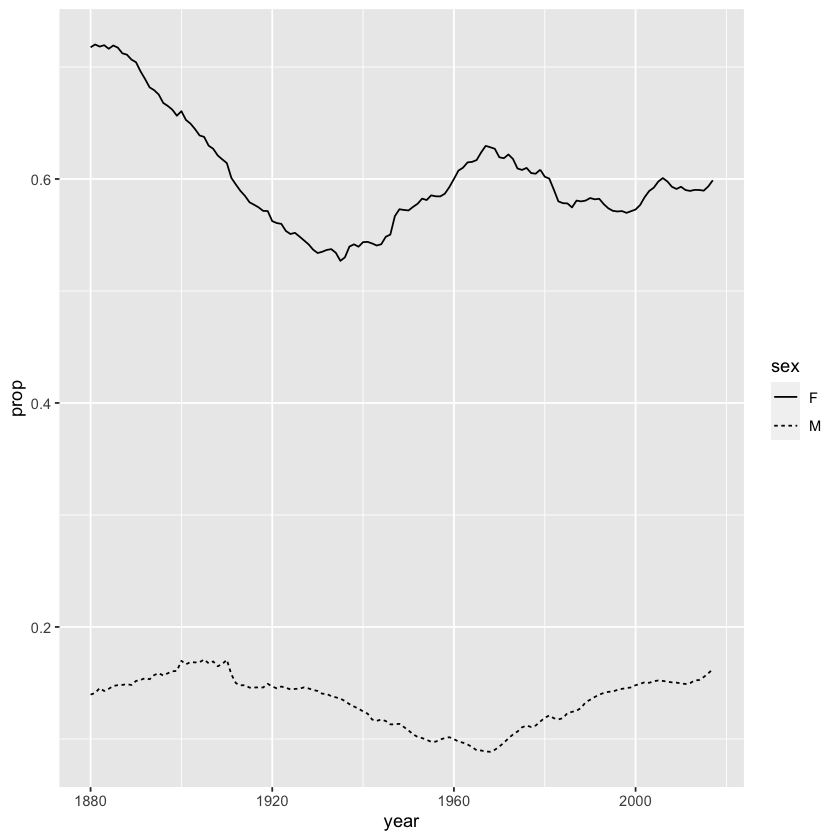

In [15]:
babynames %>% 
    mutate(last_letter = str_sub(name,-1),
           vowel = last_letter %in% c("a","e","i","o","u")) %>% 
    group_by(year,sex) %>% 
    summarize(prop = weighted.mean(vowel,n)) %>% 
    ggplot()+
    geom_line(aes(x=year,y=prop,linetype=sex))

## `str_detect`
<img src="./figures/transformation/strdetect.jpg" alt="ds" style="width: 750px;"/>

```r
strings <- c("Apple", "Orange")
str_detect(strings, "pp")
```

```r
strings <- c("Apple", "Pineapple")
str_detect(strings, "apple")
```


## Special  characters
Type `"A\B"` in the console and see what happens.

Special characters: a backslash followed by one or more characters which stand for a special type of character.
Use `writeLines()` to see the characters represented by a string.

```r
writeLines("\"")
writeLines("\\")
```


In [28]:
writeLines("A\\B")


A\B


# Atomic types and classes
R recognizes six elemental data types.
<img src="./figures/transformation/type.jpg" alt="ds" style="width: 750px;"/>
You can use atomic types to build new classes.
# Factors

R use Factors to represent categorical variables. 
Factor Consists of:  
1. A set of values  
2. A set of valid levels

Factors are stored as an integer vector with a levels attribute
```r
a <- c(1,1,3,2,3,1)
b <- factor(a)
levels(b) <- c("red","green","blue")
```


```r
eyes <- factor(x = c("blue", "green", "green"), 
          levels = c("blue", "brown", "green"))
          
levels(eyes) <- c("blue","black","white")
```



Question 2 in homework 3: plot the histograms for temperature in 12 months based on the `weather` data

```r
ggplot(data = weather)+
  geom_histogram(mapping = aes(x = temp),color= "white",binwidth = 5)+
  facet_wrap(~month,nrow=4)
```


```r
gss_cat
```

**Which religions watch the least TV?**
```r
gss_cat %>%
  filter(!is.na(tvhours)) %>%
  group_by(relig) %>%
  summarize(tvhours = mean(tvhours)) %>%
  ggplot(aes(tvhours, relig)) +
    geom_point()
```

```r
levels(gss_cat$relig)
```

## `fct_reorder`
Reorders the levels of a factor based on the result of fun(x) applied to each group of cases (grouped by level).
<img src="./figures/transformation/fctreorder.jpg" alt="ds" style="width: 750px;"/>

```r
gss_cat %>%
  filter(!is.na(tvhours)) %>%
  group_by(relig) %>%
  summarize(tvhours = mean(tvhours)) %>%
  ggplot(aes(tvhours, fct_reorder(relig, tvhours))) +
    geom_point()
```

### Your turn
Make a sensible graph of average TV consumption by marital status.

<!--```{r eval=FALSE, echo =FALSE}
gss_cat %>%
  filter(!is.na(tvhours)) %>%
  group_by(marital) %>%
  summarize(tvhours = mean(tvhours)) %>%
  ggplot(aes(tvhours, fct_reorder(marital, tvhours,.fun=mean))) +
    geom_point()
```-->


### Other reodering functions
```r
gss_cat %>%
  ggplot(aes(marital)) + geom_bar()
```
```r
gss_cat %>%
  ggplot(aes(fct_infreq(marital))) + geom_bar()
```

```r
gss_cat %>%
  ggplot(aes(fct_rev(fct_infreq(marital)))) + geom_bar()
```


## `fct_recode()`
**Compute average tv hours by party ID and then plot the results**

```r
gss_cat %>%
   filter(!is.na(tvhours)) %>%
   group_by(partyid) %>%
   summarise(tvhours = mean(tvhours)) %>%
   ggplot(aes(tvhours, fct_reorder(partyid, tvhours))) +
     geom_point() +
     labs(y = "partyid")
```


<img src="./figures/transformation/fctrecode.jpg" alt="ds" style="width: 750px;"/>

```r
gss_cat %>%
   filter(!is.na(tvhours)) %>%
    mutate(partyid = fct_recode(partyid,
    "Republican, strong"    = "Strong republican",
    "Republican, weak"      = "Not str republican",
    "Independent, near rep" = "Ind,near rep",
    "Independent, near dem" = "Ind,near dem",
    "Democrat, weak"        = "Not str democrat",
    "Democrat, strong"      = "Strong democrat")) %>% 
   group_by(partyid) %>%
   summarize(tvhours = mean(tvhours)) %>%
   ggplot(aes(tvhours, fct_reorder(partyid, tvhours))) +
     geom_point() + labs(y = "partyid")
```

## `fct_collapse()`

```r
gss_cat %>%
   filter(!is.na(tvhours)) %>%
    mutate(partyid = fct_collapse(partyid,
      "conservative" = c("Strong republican", 
                       "Not str republican", 
                       "Ind,near rep"),
      "liberal" = c("Strong democrat", 
                  "Not str democrat", 
                  "Ind,near dem"))) %>% 
   group_by(partyid) %>%
   summarize(tvhours = mean(tvhours)) %>%
   ggplot(aes(tvhours, fct_reorder(partyid, tvhours))) +
     geom_point() + labs(y = "partyid")
```

# Date times

**What is the best time of day to fly? **
```r
flights %>% 
  group_by(sched_dep_time) %>% 
  summarize(arr_delay_avg = mean(arr_delay,na.rm=TRUE)) %>% 
  ggplot(mapping = aes(x = sched_dep_time, y = arr_delay_avg)) + 
    geom_point(alpha = 0.2) + geom_smooth()
```

R's class for time:   
1. POSIXct. Stored as the number of seconds since 1970-01-01 00:00:00  
2. Dates. Stored as the number of days since 1970-01-01
```r
Sys.time()
unclass(Sys.time())
```
```r
Sys.Date()
unclass(Sys.Date())
```

Load the packcage `library(hms)`

<img src="./figures/transformation/time.jpg" alt="ds" style="width: 750px;"/>

```r
hms::hms(seconds = 56, min = 34, hour = 12)
```

## Your turn
* Use the hour and minute variables in flights to make a new variable that shows the time of each flight as an `hms`. 
Then use a smooth line to plot the relationship between time of day and `arr_delay` to show the best time of a day to fly.

<!--```{r eval=FALSE,echo =FALSE}
flights %>% 
  mutate(time = hms::hms(hour = hour, minute = minute)) %>% 
  group_by(time) %>% 
  summarize(arr_delay_avg = mean(arr_delay,na.rm=TRUE)) %>% 
  ggplot(aes(time, arr_delay_avg)) + 
    geom_point(alpha = 0.2) + geom_smooth()
``` -->

* Modify your code to make two smooth lines in one figure, one about the relationship between time of day and `arr_delay`, and other about the relationship between time of day and `dep_delay`. You will need to:
1. Create the `time` variable using `hms`
2. Caculate average departure and arrival delays for each value of `time`
3. Gather the average `arr_delay` and `dep_delay` columns into a `key:value` column pair names type and delay
4. Recode the levels of `type` column to be "Departure" and "Arrival"
5. Create the smooth line for each type of delays

<!--```{r echo=FALSE, eval=TRUE,cache=TRUE}
flights %>% 
  mutate(time = hms::hms(hour = hour, minute = minute)) %>% 
  group_by(time) %>% 
  mutate(arr_delay_avg = mean(arr_delay,na.rm=TRUE),
         dep_delay_avg = mean(dep_delay,na.rm=TRUE)) %>% 
  select(time, arr_delay_avg, dep_delay_avg) %>%
  gather("type", "delay", 2:3) %>%
  mutate(type = fct_recode(type, 
    "Arrival" = "arr_delay_avg", "Departure" = "dep_delay_avg")) %>% 
  ggplot(aes(time, delay, color = type)) + geom_smooth()
```-->



**What is the best day of the week to fly?**

Load the package `library(lubridate)`

To parse strings as dates, use the function whose name is y, m, d, h, m, s in the correct order.

```r
ymd("2012/01/11")
mdy("January 11 2012")
ymd_hms("2012-01-11  01:30:55")
```

Extract components by name with a singular name

```r
date <- ymd("2019-01-11")
year(date)
year(date) <- 1999
date
```
<img src="./figures/transformation/timeextract.jpg" alt="ds" style="width: 750px;"/>

```r
wday(ymd("2019-01-11"))
wday(ymd("2019-01-11"), label = TRUE)
wday(ymd("2019-01-11"), label = TRUE, abbr = FALSE)
```

## Your turn
* Extract the day of the week of each flight (as a full name) from `time_hour`. 
Plot the average arrival delay by day as a column chart (bar chart).
<!--```{r eval=FALSE,echo =FALSE}
flights %>% 
  filter(!is.na(arr_delay)) %>% 
  mutate(weekday = wday(time_hour, label = TRUE, abbr = FALSE)) %>% 
  group_by(weekday) %>% 
  summarize(avg_delay = mean(arr_delay)) %>% 
  ggplot() +
    geom_col(mapping = aes(x = weekday, y = avg_delay))
```-->
